# Investigate Training Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import os

# Import ML tools
module_path = '/home/russbate/MLPionCollaboration/LCStudies/'
import sys
sys.path.append(module_path)
from util import resolution_util as ru
from util import plot_util as pu
from util import deep_set_util as dsu

cwd = os.getcwd()

## Import History

In [27]:
with open(cwd+'/results/history_PFN_base_LR--1e-03_BS--2000_EP--800_EV--200000_2022'+\
          '-02-13.pickle', 'rb') as pfn_base_histFile:
    PFN_base_hist = pickle.load(pfn_base_histFile)
    
with open(cwd+'/results/history_PFN_wDropout_STMC_--LR_3e-03--BS_1500--EP_800--EV_200000--2022'+\
          '-02-15.pickle', 'rb') as pfn_wDropout_histFile:
    PFN_wDropout_hist = pickle.load(pfn_wDropout_histFile)

with open(cwd+'/results/history_PFN_wTNet_LR--1e-03_BS--2000_EP--800_EV--200000_2022'+\
          '-02-13.pickle', 'rb') as pfn_wTNet_histFile:
    PFN_wTNet_hist = pickle.load(pfn_wTNet_histFile)

type(PFN_base_hist)
print(PFN_base_hist.keys())

/home/russbate/MLPionCollaboration/LCStudies/regression
dict_keys(['loss', 'val_loss'])


## Plot History

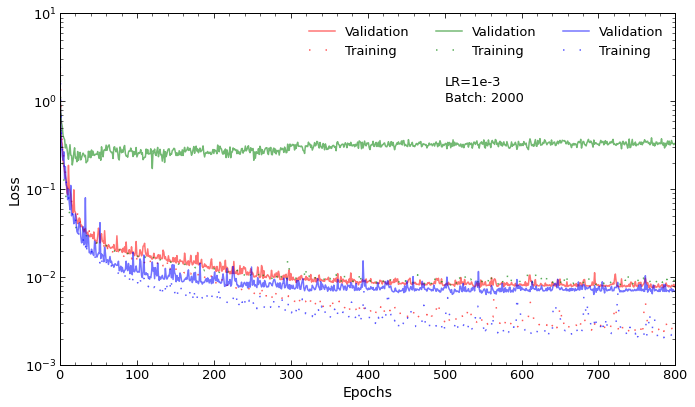

In [28]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_base_hist['val_loss'], label="Validation", color='red',
         ls='solid', alpha=.55)
plt.plot(PFN_base_hist['loss'], label="Training", color='red',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_wDropout_hist['val_loss'], label="Validation", color='green',
         ls='solid', alpha=.55)
plt.plot(PFN_wDropout_hist['loss'], label="Training", color='green',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_wTNet_hist['val_loss'], label="Validation", color='blue',
         ls='solid', alpha=.55)
plt.plot(PFN_wTNet_hist['loss'], label="Training", color='blue',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.001,10)
plt.yticks(fontsize=13)
plt.xlim(0,800)
plt.xticks(fontsize=13)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=3)
plt.text(500, 1.5, 'LR=1e-3', fontsize=13)
plt.text(500, 1, 'Batch: 2000', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/February22/STMC_ModelComparison_'+\
#             'lossCurves_2000batch_LR1e-3_2022-02-15.png', format='png')
plt.show()

## Import Target vs Predictions Results

In [4]:
tpreds_PFN_base = np.load('results/target_preds_PFN_base_LR--1e-03_BS--2000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')
tpreds_PFN_wDropout = np.load('results/target_preds_PFN_wDropout_LR--1e-03_BS--1000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')
tpreds_PFN_wTNet = np.load('results/target_preds_PFN_wTNet_LR--1e-03_BS--2000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')

In [5]:
## PFN BASE
print(tpreds_PFN_base['kwds'])
PFN_base_target = tpreds_PFN_base['args'][0]
PFN_base_preds = tpreds_PFN_base['args'][1]

## PFN WDROPOUT
PFN_wDropout_target = tpreds_PFN_wDropout['args'][0]
PFN_wDropout_preds = tpreds_PFN_wDropout['args'][1]

## PFN WDROPOUT
PFN_wTNet_target = tpreds_PFN_wTNet['args'][0]
PFN_wTNet_preds = tpreds_PFN_wTNet['args'][1]

['target' 'prediction']


### Make List of Results

In [6]:
targs = [PFN_base_target, PFN_wDropout_target, PFN_wTNet_target]
preds = [PFN_base_preds, PFN_wDropout_preds, PFN_wTNet_preds]

xList = []
yList = []
for pi, ti in zip(preds, targs):
    xList.append(np.exp(ti))
    yList.append(np.exp(pi)/np.exp(ti))

print(len(xList))
print(len(yList))

3
3


In [7]:
respColors = ['red', 'green', 'blue']
respLabels = ['Base', 'Dropout', 'TNet']

print(np.any(len(xList) != np.array([len(yList), len(respColors), len(respLabels)])))

False


### Plot Results

<Figure size 799.992x599.976 with 0 Axes>

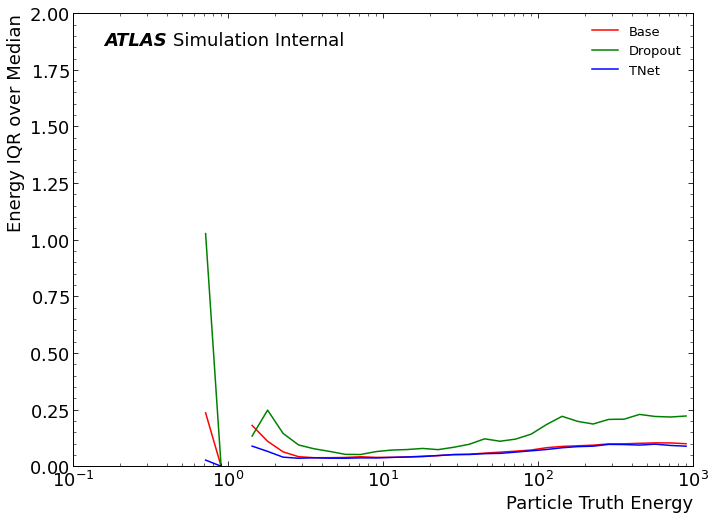

In [18]:
# filedest = 'Regression_Plots/February22/STMC_ModelComparison_'+\
#                     'IQRovMed_2000batch_LR1e-3_2022-02-15.png'
filedest=''
resp_plot = ru.resolutionPlot(x=xList,
                    y=yList,
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=respColors,
                             labels=respLabels)

# EM versus nonEM

In [29]:
with open('results/history_PFN_base_wEM_PIPM--LR_3e-03--BS_1600--EP_300'+\
          '--EV_200000--2022-02-15.pickle', 'rb') as pfn_em_histFile:
    PFN_EM_hist = pickle.load(pfn_em_histFile)
    
with open('results/history_PFN_base_noEM_PIPM--LR_3e-03--BS_1600--EP_300'+\
          '--EV_200000--2022-02-15.pickle', 'rb') as pfn_noem_histFile:
    PFN_noEM_hist = pickle.load(pfn_noem_histFile)

## Plot Loss Curves

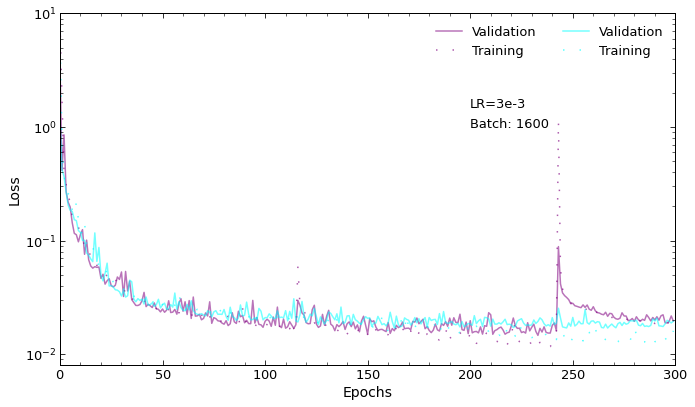

In [39]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_EM_hist['val_loss'], label="Validation", color='purple',
         ls='solid', alpha=.55)
plt.plot(PFN_EM_hist['loss'], label="Training", color='purple',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_noEM_hist['val_loss'], label="Validation", color='cyan',
         ls='solid', alpha=.55)
plt.plot(PFN_noEM_hist['loss'], label="Training", color='cyan',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.008,10)
plt.yticks(fontsize=13)
plt.xlim(0,300)
plt.xticks(fontsize=13)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2)
plt.text(200, 1.5, 'LR=3e-3', fontsize=13)
plt.text(200, 1, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/February22/PIPM_EMComparison_'+\
#             'lossCurves_1600batch_LR3e-3_2022-02-15.png', format='png')
plt.show()

## Targets vs Predictions

In [33]:
tpreds_PFN_EM = np.load('results/target_preds_PFN_base_noEM_PIPM--LR_3e-03'+\
                          '--BS_1600--EP_300--EV_200000--2022-02-15.npz')
tpreds_PFN_noEM = np.load('results/target_preds_PFN_base_noEM_PIPM--LR_3e-03'+\
                          '--BS_1600--EP_300--EV_200000--2022-02-15.npz')

In [34]:
## PFN BASE
print(tpreds_PFN_base['kwds'])
PFN_EM_target = tpreds_PFN_base['args'][0]
PFN_EM_preds = tpreds_PFN_base['args'][1]

## PFN WDROPOUT
PFN_noEM_target = tpreds_PFN_wDropout['args'][0]
PFN_noEM_preds = tpreds_PFN_wDropout['args'][1]

['target' 'prediction']


### Resolution Plot

In [35]:
targs2 = [PFN_EM_target, PFN_noEM_target]
preds2 = [PFN_EM_preds, PFN_noEM_preds]

xList2 = []
yList2 = []
for pi, ti in zip(preds2, targs2):
    xList2.append(np.exp(ti))
    yList2.append(np.exp(pi)/np.exp(ti))

In [36]:
respColors2 = ['purple', 'cyan']
respLabels2 = ['EM', 'noEM']

<Figure size 799.992x599.976 with 0 Axes>

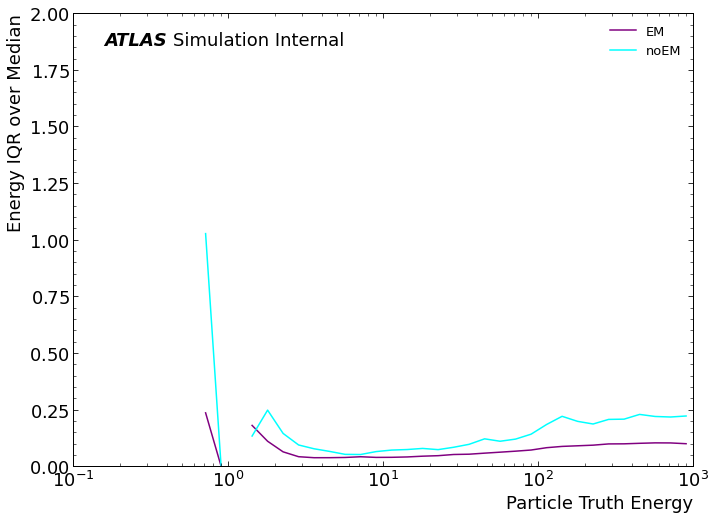

In [40]:
# filedest = 'Regression_Plots/February22/PIPM_EMComparison_'+\
#             'IQRoverMed_1600batch_LR3e-3_2022-02-15.png'
filedest=''
resp_plot = ru.resolutionPlot(x=xList2,
                    y=yList2,
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=respColors2,
                             labels=respLabels2)

# Standard Training

In [27]:
cwd = os.getcwd()
print(cwd)
filestr = 'history_PFN_base_STMCv2--LR_1e-03--BS_1600--EP_200--'\
    +'EV_200000--2022-04-22.pickle'
with open(cwd+'/results/'+filestr, 'rb') as pfn_base_histFile:
    PFN_base_hist = pickle.load(pfn_base_histFile)

print(type(PFN_base_hist))
print(PFN_base_hist.keys())

/home/russbate/MLPionCollaboration/LCStudies/regression
<class 'dict'>
dict_keys(['loss', 'val_loss'])


### Results

### Loss Curves

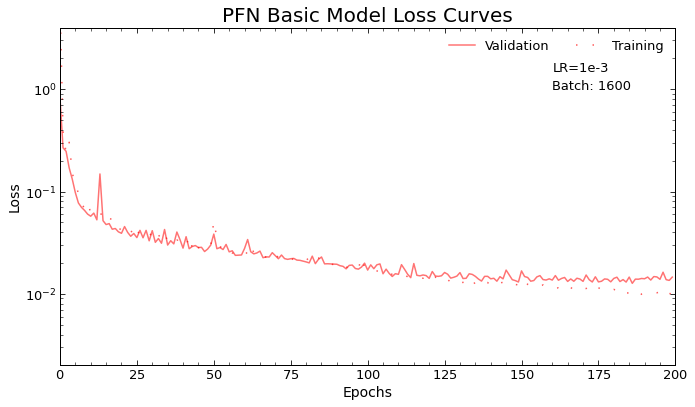

In [28]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_base_hist['val_loss'], label="Validation", color='red',
         ls='solid', alpha=.55)
plt.plot(PFN_base_hist['loss'], label="Training", color='red',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.002,4)
plt.yticks(fontsize=13)
plt.xlim(0,200)
plt.xticks(fontsize=13)
plt.title('PFN Basic Model Loss Curves')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2)
plt.text(160, 1.5, 'LR=1e-3', fontsize=13)
plt.text(160, 1, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/April22/STMCv2_PFN_base_'+\
#             'lossCurves_1600batch_LR1e-3_2022-04-21.png', format='png')
plt.show()

### Load Numpy Files

In [29]:
## Load Energy Normalization Number
with open('STMC_v2_25_files_Y_logmean.txt', 'r') as Efile:
    Efile_line = Efile.readline()
    E_logmean = float(Efile_line)
    print(E_logmean)

4.424025033109838


In [30]:
targ_pred_base = np.load('results/target_preds_PFN_base_STMCv2--LR_1e-03--BS_'\
                         +'1600--EP_200--EV_200000--2022-04-22.npz')
targ_pred_base_old = np.load('results/target_preds_PFN_base_STMCv2--LR_1e-03--'\
                +'BS_1600--EP_200--EV_200000--2022-04-26_old_normalization.npz')
print(targ_pred_base['kwds'])
targ_base_raw = targ_pred_base['args'][0]
pred_base_raw = targ_pred_base['args'][1]
eta_base = targ_pred_base['args'][2]

targ_base_rold = targ_pred_base_old['args'][0]
pred_base_rold = targ_pred_base_old['args'][1]

['target' 'prediction' 'Eta']


### Show Targets vs Prediction

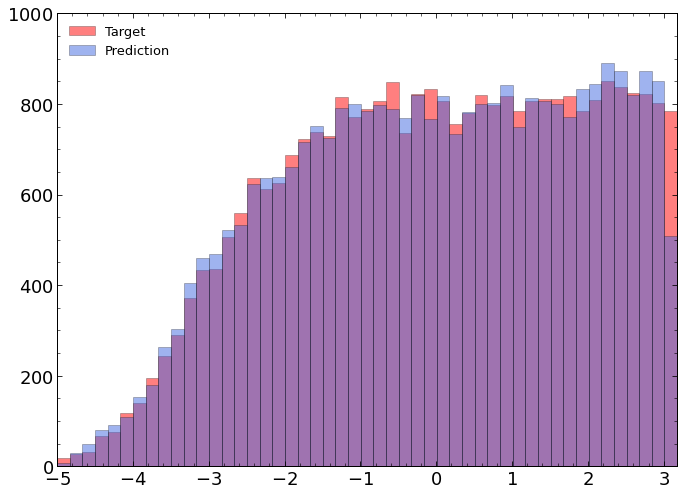

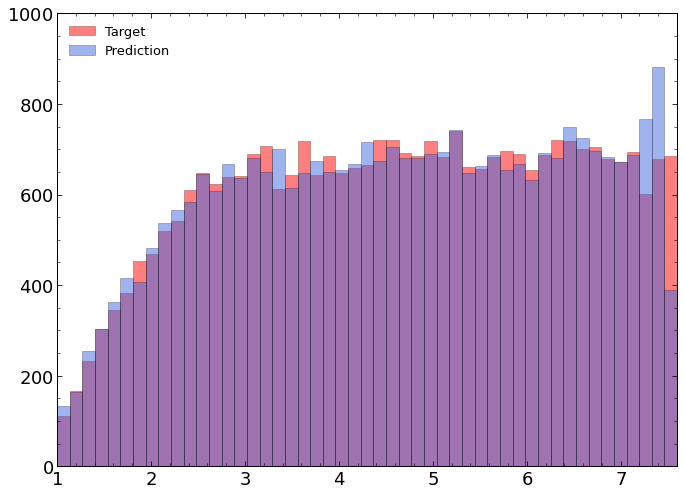

In [31]:
logTarg_bins = np.linspace(-5, np.log(2000)-E_logmean, 50, endpoint=True)

plt.hist(targ_base_raw, bins=logTarg_bins, alpha=.5, edgecolor='black', label='Target',
        color='red')
plt.hist(pred_base_raw, bins=logTarg_bins, alpha=.5, edgecolor='black',
         label='Prediction', color='royalblue')
plt.legend(loc='upper left')
plt.xlim(-5,np.max(logTarg_bins))
plt.show()


## Old
logTarg_bins_old = np.linspace(1, np.log(2000), 50, endpoint=True)

plt.hist(targ_base_rold, bins=logTarg_bins_old, alpha=.5, edgecolor='black', label='Target',
        color='red')
plt.hist(pred_base_rold, bins=logTarg_bins_old, alpha=.5, edgecolor='black',
         label='Prediction', color='royalblue')
plt.legend(loc='upper left')
plt.xlim(1,np.log(2000))
plt.show()

In [32]:
targ_base = np.exp(targ_base_raw + E_logmean)
pred_base = np.exp(pred_base_raw + E_logmean)
response_base = np.divide(pred_base, targ_base)

targ_bold = np.exp(targ_base_rold)
pred_bold = np.exp(pred_base_rold)
response_bold = np.divide(pred_bold, targ_bold)

print(targ_bold.shape)
print(targ_base.shape)
print(np.count_nonzero(targ_bold))

(30000,)
(30000,)
30000


### Resolution Plot

<Figure size 799.992x599.976 with 0 Axes>

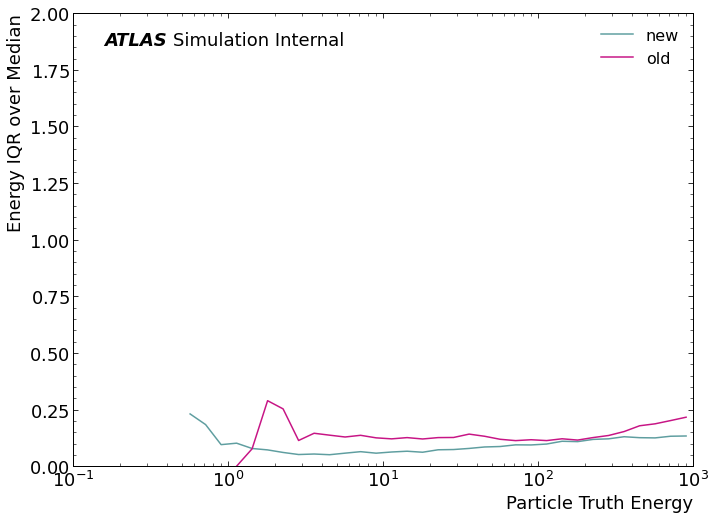

In [60]:
# filedest='Regression_Plots/April22/PFN_base_norm_comparison'+\
#             'IQRoverMed_1600batch_LR1e-3_2022-04-26.png'
filedest=''
reso_plot = ru.resolutionPlot(x=[targ_base, targ_bold],
                    y=[response_base, response_bold],
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=['cadetblue', 'mediumvioletred'],
                    labels=['new', 'old'],
                    leg_font_size=16)

### Response Plot

<Figure size 799.992x599.976 with 0 Axes>

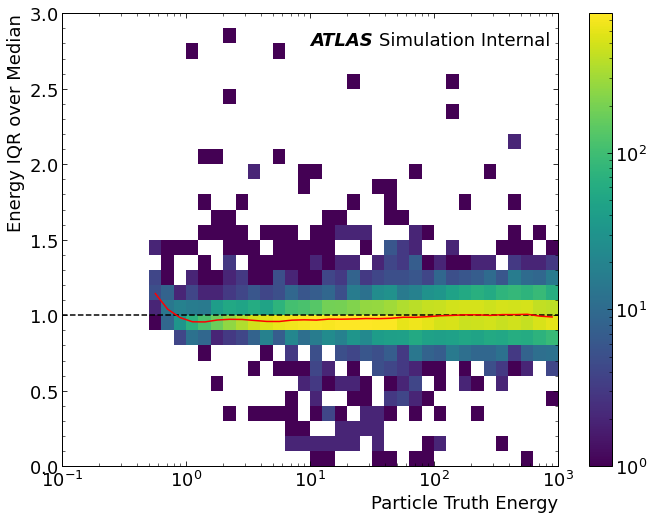

In [39]:
# filedest = 'Regression_Plots/April22/STMC_ResponsePlot_'+\
#             '_1600batch_LR1e-3_2022-04-26.png'
filedest=''
resp_plot = ru.responsePlot(x=targ_base,
                    y=response_base,
                    figfile=filedest,
                    statistic='median', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.5, atlas_y=.96, simulation=True,
                    textlist=[], cblabel='')

## Tracks Only

### Loss Curves

In [40]:
cwd = os.getcwd()

filestrTr = 'history_PFN_base_STMCv2--LR_1e-03--BS_1600--EP_200--EV_200000--2022'\
    +'-04-22_TracksToTruthPartE.pickle'
with open(cwd+'/results/'+filestrTr, 'rb') as pfn_tr_histFile:
    PFN_Tr_hist = pickle.load(pfn_tr_histFile)

print(PFN_Tr_hist.keys())

dict_keys(['loss', 'val_loss'])


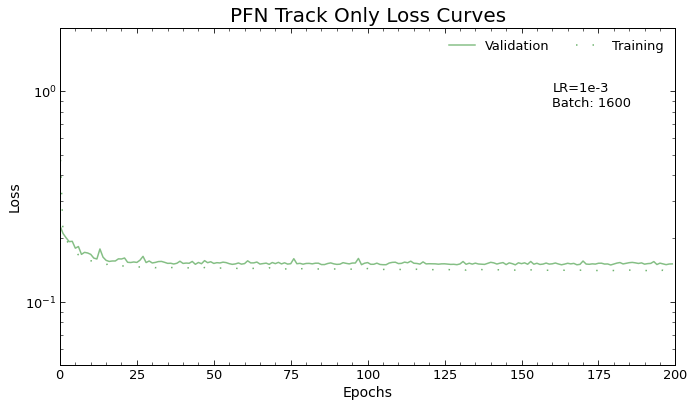

In [41]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_Tr_hist['val_loss'], label="Validation", color='forestgreen',
         ls='solid', alpha=.55)
plt.plot(PFN_Tr_hist['loss'], label="Training", color='forestgreen',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.05,2)
plt.yticks(fontsize=13)
plt.xlim(0,200)
plt.xticks(fontsize=13)
plt.title('PFN Track Only Loss Curves')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2)
plt.text(160, 1, 'LR=1e-3', fontsize=13)
plt.text(160, .85, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/April22/STMCv2_PFN_base_Tr_'+\
#             'lossCurves_1600batch_LR1e-3_2022-04-26.png', format='png')
plt.show()

## Load Energy Normalization Number

In [42]:
## Load Energy Normalization Number
with open('STMC_v2_25_files_Y_logmean.txt', 'r') as Efile:
    Efile_line = Efile.readline()
    E_logmean = float(Efile_line)
    print(E_logmean)

4.424025033109838


In [43]:
targ_pred_tr = np.load('results/target_preds_PFN_base_STMCv2--LR_1e-03--BS_160'\
                    +'0--EP_200--EV_200000--2022-04-22_TracksToTruthPartE.npz')

print(targ_pred_tr['kwds'])
targ_tr_raw = targ_pred_tr['args'][0]
pred_tr_raw = targ_pred_tr['args'][1]
eta_tr_base = targ_pred_tr['args'][2]

['target' 'prediction' 'Eta']


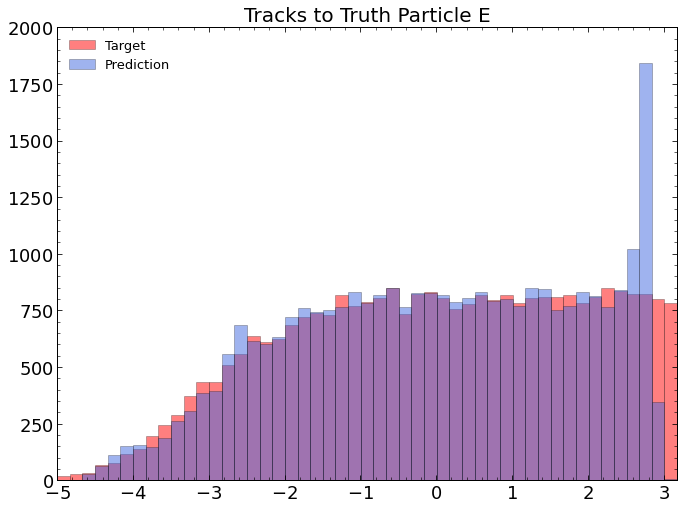

In [44]:
logTarg_bins = np.linspace(-5, np.log(2000)-E_logmean, 50, endpoint=True)

plt.hist(targ_tr_raw, bins=logTarg_bins, alpha=.5, edgecolor='black', label='Target',
        color='red')
plt.hist(pred_tr_raw, bins=logTarg_bins, alpha=.5, edgecolor='black',
         label='Prediction', color='royalblue')
plt.legend(loc='upper left')
plt.xlim(-5,np.max(logTarg_bins))
plt.title('Tracks to Truth Particle E')
plt.show()

In [45]:
targ_tr = np.exp(targ_tr_raw + E_logmean)
pred_tr = np.exp(pred_tr_raw + E_logmean)
response_tr = np.divide(pred_tr, targ_tr)

### Response Plot

<Figure size 799.992x599.976 with 0 Axes>

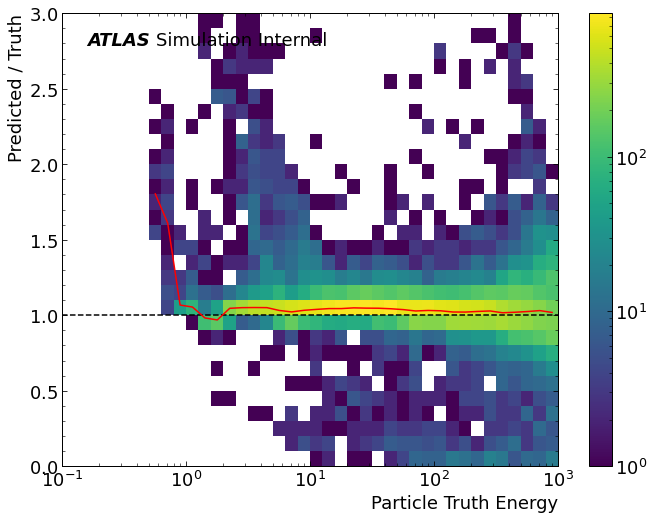

In [47]:
# filedest = 'Regression_Plots/April22/ResponsePlot_Tr_1600batch_LR1e-3_2022-'\
#     +'04-26.png'
filedest=''
resp_plot = ru.responsePlot(x=targ_tr,
                    y=response_tr,
                    figfile=filedest,
                    statistic='median', xlabel='Particle Truth Energy',
                    ylabel='Predicted / Truth',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], cblabel='')

### Resolution Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 799.992x599.976 with 0 Axes>

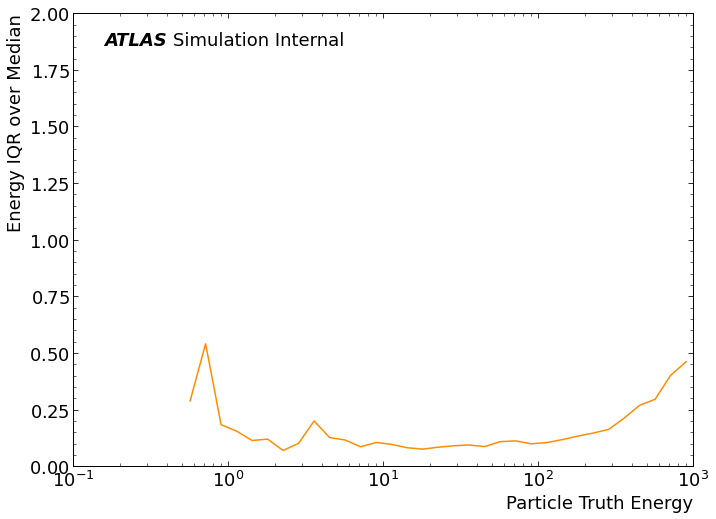

In [69]:
# filedest='Regression_Plots/April22/TracksOnly_'+\
#             'IQRoverMed_1600batch_LR1e-3_2022-04-25.png'
filedest=''
reso_plot_tr = ru.resolutionPlot(x=[targ_tr],
                    y=[response_tr],
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy',
                    ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=['darkorange'],
                    labels=[''])

## Cluster Only

### Loss Curves

In [48]:
cwd = os.getcwd()
filestrCl = 'history_PFN_base_STMCv2--LR_1e-03--BS_1600--EP_200--EV_200000--20'\
    +'22-04-22_ClustersToTruthPartE.pickle'

with open(cwd+'/results/'+filestrCl, 'rb') as pfn_cl_histFile:
    PFN_Cl_hist = pickle.load(pfn_cl_histFile)

print(PFN_Cl_hist.keys())

dict_keys(['loss', 'val_loss'])


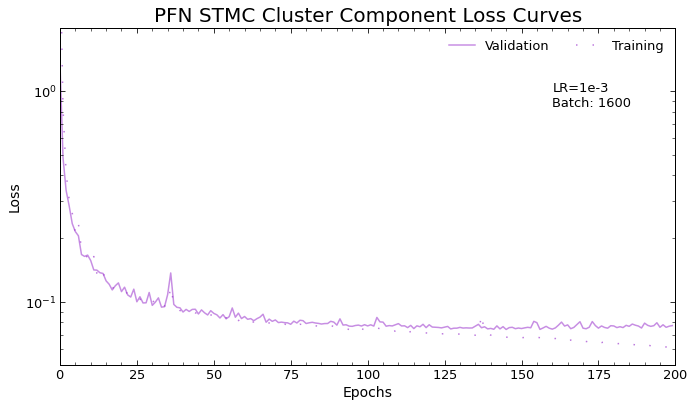

In [49]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_Cl_hist['val_loss'], label="Validation", color='darkorchid',
         ls='solid', alpha=.55)
plt.plot(PFN_Cl_hist['loss'], label="Training", color='darkorchid',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.05,2)
plt.yticks(fontsize=13)
plt.xlim(0,200)
plt.xticks(fontsize=13)
plt.title('PFN STMC Cluster Component Loss Curves')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2)
plt.text(160, 1, 'LR=1e-3', fontsize=13)
plt.text(160, .85, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/April22/STMCv2_PFN_base_Cl_'+\
#             'lossCurves_1600batch_LR1e-3_2022-04-26.png', format='png')
plt.show()

### Load Numpy Files

In [50]:
targ_pred_cl = np.load('results/target_preds_PFN_base_STMCv2--LR_1e-03--BS_160'\
                    +'0--EP_200--EV_200000--2022-04-22_ClustersToTruthPartE.npz')

print(targ_pred_cl['kwds'])
targ_cl_raw = targ_pred_cl['args'][0]
pred_cl_raw = targ_pred_cl['args'][1]
eta_cl_base = targ_pred_cl['args'][2]

['target' 'prediction' 'Eta']


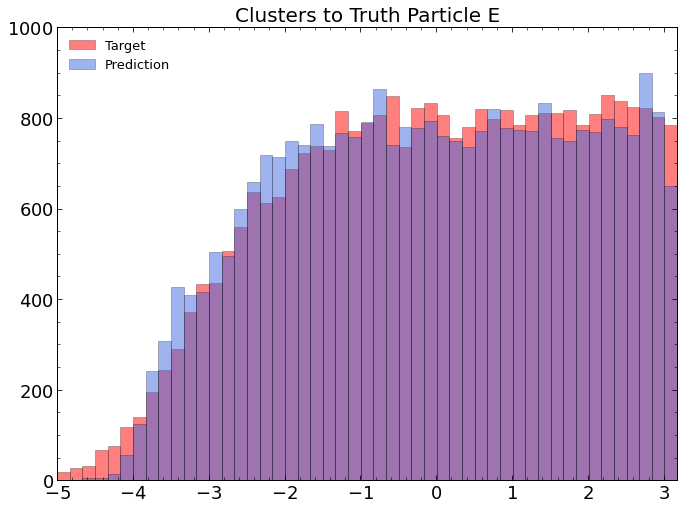

In [51]:
logTarg_bins = np.linspace(-5, np.log(2000)-E_logmean, 50, endpoint=True)

plt.hist(targ_cl_raw, bins=logTarg_bins, alpha=.5, edgecolor='black',
        label='Target', color='red')
plt.hist(pred_cl_raw, bins=logTarg_bins, alpha=.5, edgecolor='black',
         label='Prediction', color='royalblue')
plt.legend(loc='upper left')
plt.xlim(-5,np.max(logTarg_bins))
plt.title('Clusters to Truth Particle E')
plt.show()

In [52]:
targ_cl = np.exp(targ_cl_raw + E_logmean)
pred_cl = np.exp(pred_cl_raw + E_logmean)
response_cl = np.divide(pred_cl, targ_cl)

### Response Plot

<Figure size 799.992x599.976 with 0 Axes>

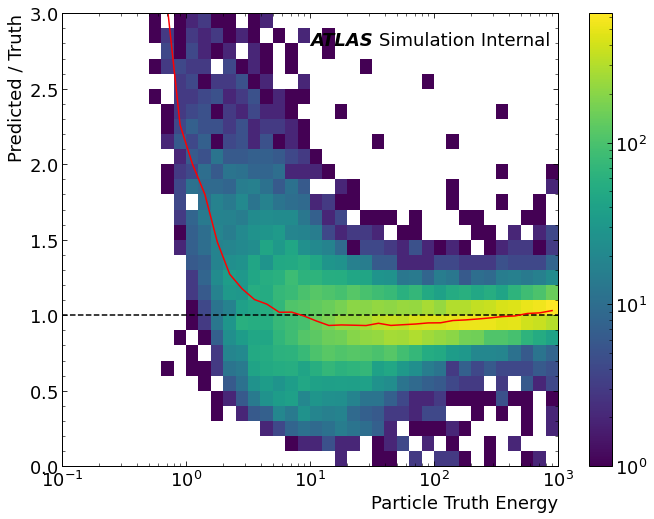

In [55]:
# filedest = 'Regression_Plots/April22/ResponsePlot_Cl_1600batch_LR1e-3_2022-'\
#     +'04-26.png'
filedest=''
resp_plot = ru.responsePlot(x=targ_cl,
                    y=response_cl,
                    figfile=filedest,
                    statistic='median', xlabel='Particle Truth Energy',
                    ylabel='Predicted / Truth',
                    atlas_x=.5, atlas_y=.96, simulation=True,
                    textlist=[], cblabel='')

### Resolution Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 799.992x599.976 with 0 Axes>

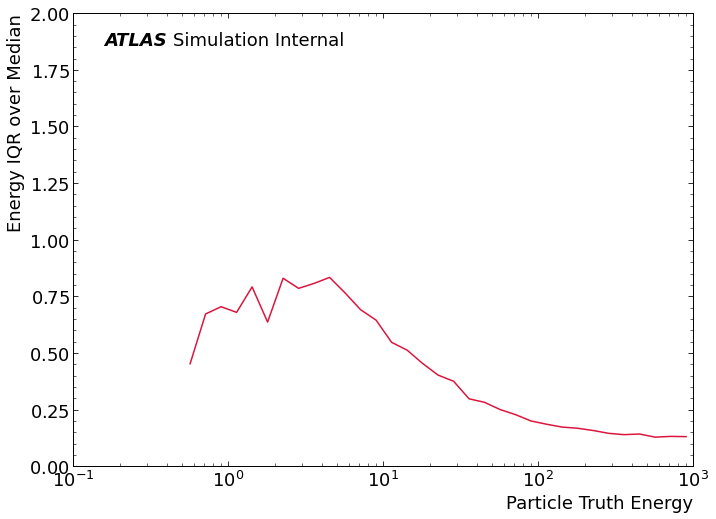

In [97]:
# filedest='Regression_Plots/April22/STMC_Clusters_'+\
#             'IQRoverMed_1600batch_LR1e-3_2022-04-25.png'
filedest=''
reso_plot_cl = ru.resolutionPlot(x=[targ_cl],
                    y=[response_cl],
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy',
                    ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=['crimson'],
                    labels=[''])

# Combined Results
## Resolution

<Figure size 799.992x599.976 with 0 Axes>

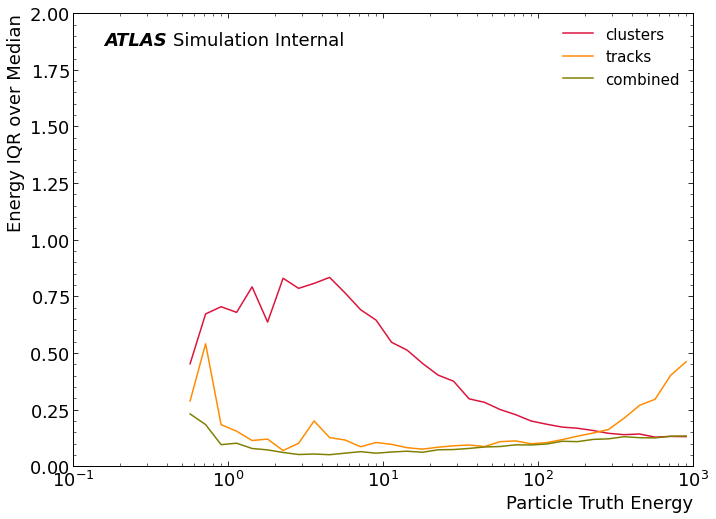

In [58]:
# filedest='Regression_Plots/April22/STMC_Cl_Tr_Comb_'+\
#             'IQRoverMed_2022-04-26.png'
filedest=''
reso_plot_all = ru.resolutionPlot(x=[targ_cl, targ_tr, targ_base],
                    y=[response_cl, response_tr, response_base],
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy',
                    ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=['crimson', 'darkorange', 'olive'],
                    labels=['clusters', 'tracks', 'combined'],
                    leg_font_size=15)

# Cluster Only (CLO)

In [2]:
filestrCLO = 'history_PFN_base_STMCv2--LR_1e-03--BS_1600--EP_200--EV_200000--'\
    +'2022-04-27_CLO.pickle'

with open(cwd+'/results/'+filestrCLO, 'rb') as pfn_CLO_histFile:
    PFN_CLO_hist = pickle.load(pfn_CLO_histFile)

print(PFN_CLO_hist.keys())

dict_keys(['loss', 'val_loss'])


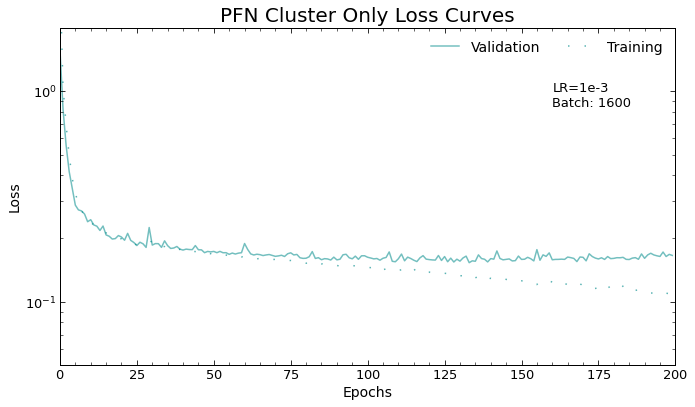

In [9]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_CLO_hist['val_loss'], label="Validation", color='darkcyan',
         ls='solid', alpha=.55)
plt.plot(PFN_CLO_hist['loss'], label="Training", color='darkcyan',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.05,2)
plt.yticks(fontsize=13)
plt.xlim(0,200)
plt.xticks(fontsize=13)
plt.title('PFN Cluster Only Loss Curves')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2, prop={'size':14})
plt.text(160, 1, 'LR=1e-3', fontsize=13)
plt.text(160, .85, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/April22/CLO_'+\
#             'lossCurves_1600batch_LR1e-3_2022-04-26.png', format='png')
plt.show()

### Load Numpy Files

In [13]:
targ_pred_clo = np.load('results/target_preds_PFN_base_STMCv2--LR_1e-03--BS_'\
                       +'1600--EP_200--EV_200000--2022-04-27_CLO.npz')

print(targ_pred_clo['kwds'])
targ_clo_raw = targ_pred_clo['args'][0]
pred_clo_raw = targ_pred_clo['args'][1]
eta_clo_base = targ_pred_clo['args'][2]

['target' 'prediction' 'Eta']


### Energy Normalization Number

In [14]:
## Load Energy Normalization Number
with open('CLO_50_files_Y_logmean.txt', 'r') as Efile:
    Efile_line = Efile.readline()
    E_CLO_logmean = float(Efile_line)
    print(E_CLO_logmean)

2.0440774800192347


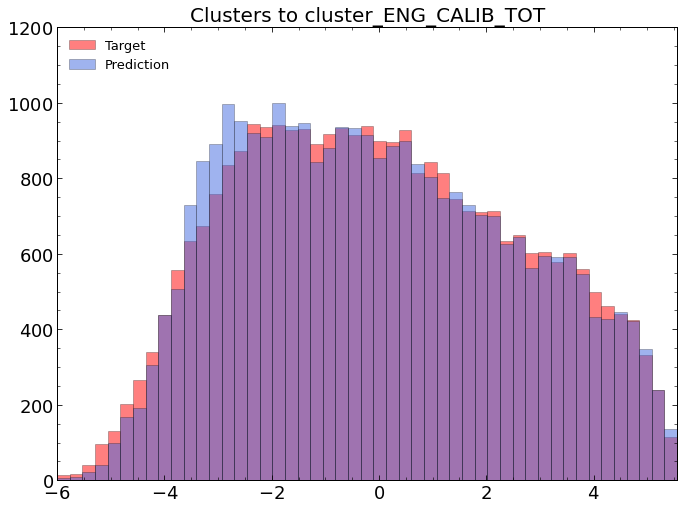

In [18]:
logTarg_bins = np.linspace(-6, np.log(2000)-E_CLO_logmean,
                           50, endpoint=True)

plt.hist(targ_clo_raw, bins=logTarg_bins, alpha=.5, edgecolor='black', label='Target',
        color='red')
plt.hist(pred_clo_raw, bins=logTarg_bins, alpha=.5, edgecolor='black',
         label='Prediction', color='royalblue')
plt.legend(loc='upper left')
plt.xlim(np.min(logTarg_bins), np.max(logTarg_bins))
plt.title('Clusters to cluster_ENG_CALIB_TOT')
plt.show()

In [20]:
targ_clo = np.exp(targ_clo_raw + E_CLO_logmean)
pred_clo = np.exp(pred_clo_raw + E_CLO_logmean)
response_clo = np.divide(pred_clo, targ_clo)

### Response Plot

<Figure size 799.992x599.976 with 0 Axes>

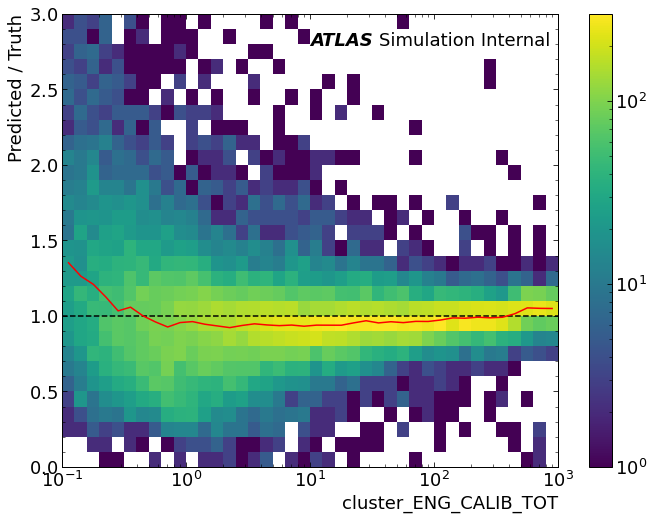

In [26]:
# filedest = 'Regression_Plots/April22/ResponsePlot_CLO_1600batch_LR1e-3_2022-'\
#     +'04-28.png'
filedest=''
resp_plot = ru.responsePlot(x=targ_clo,
                    y=response_clo,
                    figfile=filedest,
                    statistic='median', xlabel='cluster_ENG_CALIB_TOT',
                    ylabel='Predicted / Truth',
                    atlas_x=.5, atlas_y=.96, simulation=True,
                    textlist=[], cblabel='')

### Resolution Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 799.992x599.976 with 0 Axes>

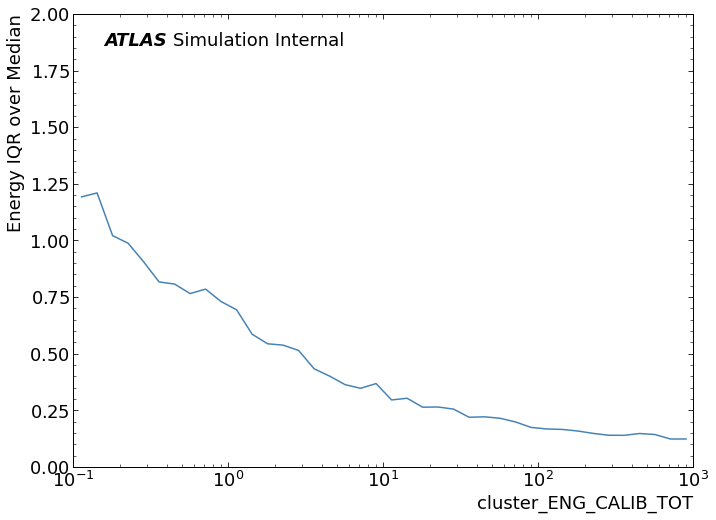

In [62]:
# filedest='Regression_Plots/April22/CLO_'+\
#             'IQRoverMed_1600batch_LR1e-3_2022-04-28.png'
filedest=''
reso_plot_cl = ru.resolutionPlot(x=[targ_clo],
                    y=[response_clo],
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='cluster_ENG_CALIB_TOT',
                    ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=['steelblue'],
                    labels=[''])